# Importing libraries

In [1]:
# pip install ...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import ppscore as pps
import plotly.subplots as ps
import plotly.graph_objs as go

In [3]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense

# Loading data

In [5]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Understanding data

In [6]:
# no. of rows and columns
print(data.shape)

(299, 13)


In [7]:
# attributes in dataset
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [9]:
data.sample(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.000        0                       582         0                 80   
206  40.000        1                       101         0                 40   
172  70.000        1                       171         0                 60   
15   82.000        1                       379         0                 50   
62   55.000        0                       109         0                 35   
5    90.000        1                        47         0                 40   
180  40.000        0                       478         1                 30   
251  55.000        0                       572         1                 35   
1    55.000        0                      7861         0                 38   
188  60.667        1                       151         1                 40   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
206                    0  226000.00              0.80           141    0   
172                    1  176000.00              1.10           145    1   
15                     0   47000.00              1.30           136    1   
62                     0  254000.00              1.10           139    1   
5                      1  204000.00              2.10           132    1   
180                    0  303000.00              0.90           136    1   
251                    0  231000.00              0.80           143    0   
1                      0  263358.03              1.10           136    1   
188                    1  201000.00              1.00           136    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
206        0   187            0  
172        1   146            0  
15         0    13            1  
62         1    60            0  
5          1     8            1  
180        0   148            0  
251        0   215            0  
1          0     6            1  
188        0   172            0

In [10]:
data.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

In [11]:
data.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [13]:
tmp = []
for col in data.columns:
    tmp.append([col, type(data[col][0]), data[col].isnull().sum(), data[col].nunique()])

df = pd.DataFrame(data=tmp, columns=['Attributes','Datatype', 'Null', 'Unique'])
df.insert(2,'Non-null', len(data)-df['Null'])
df

Attributes                 Datatype  Non-null  Null  Unique
0                        age  <class 'numpy.float64'>       299     0      47
1                    anaemia    <class 'numpy.int64'>       299     0       2
2   creatinine_phosphokinase    <class 'numpy.int64'>       299     0     208
3                   diabetes    <class 'numpy.int64'>       299     0       2
4          ejection_fraction    <class 'numpy.int64'>       299     0      17
5        high_blood_pressure    <class 'numpy.int64'>       299     0       2
6                  platelets  <class 'numpy.float64'>       299     0     176
7           serum_creatinine  <class 'numpy.float64'>       299     0      40
8               serum_sodium    <class 'numpy.int64'>       299     0      27
9                        sex    <class 'numpy.int64'>       299     0       2
10                   smoking    <class 'numpy.int64'>       299     0       2
11                      time    <class 'numpy.int64'>       299     0     148
12               DEATH_EVENT    <class 'numpy.int64'>       299     0       2

In [12]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#### There are no numeric data in string format in the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### There are no null values in the dataset

### Finding class imbalancement

In [14]:
# computing imbalance in terms of target attribute
data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [15]:
# computing imbalance in percentage
data_true = data[data['DEATH_EVENT'] == 1]
data_false = data[data['DEATH_EVENT'] == 0]
print('Percantage of people who died are:\t {}%'.format((data_true.shape[0]/data.shape[0])*100))
print('Percantage of people who survived are:\t {}%'.format((data_false.shape[0]/data.shape[0])*100))

Percantage of people who died are:	 32.10702341137124%
Percantage of people who survived are:	 67.89297658862876%


Text(0.5, 1.0, 'Class Distribution')

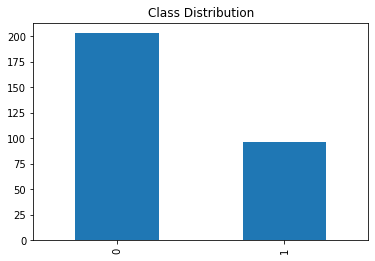

In [16]:
data["DEATH_EVENT"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

Computing the class imbalancement is necessary since this is a medical dataset.

# Pre-processing data

### Removing unnecessary columns

In [17]:
# cols = []
# data.drop(cols, axis=1, inplace=True)

#### There are no unnecessary columns in the dataset to be removed

### Renaming columns

In [18]:
# data.rename(columns={'' : ''} , inplace=True)
# data.head()

#### There is no need to rename columns

### Checking missing values

In [19]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Removing rows with missing values

In [20]:
# data.dropna(inplace=True)
# data.isnull().sum()
# print(data.shape)

#### There are no missing values in the dataset
Thus, there is no need to impute or remove any rows from the dataset.

### One Hot encoding

#### There is no need to perform one hot encoding as the categorical attributes are already in the form of binary data

### Sorting dataset

In [21]:
# df = pd.DataFrame(data)
# sdata = df.sort_values(by ='age', ascending = 1)
# sdata.head()

#### There is no need to sort the dataset with respect to any attribute since all of them have equal significance

# Feature Selection

### Classifying categorical & numerical features

In [22]:
cat_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
num_features = pd.Series(data.columns)
num_features = num_features[~num_features.isin(cat_features)]

cat_features, num_features

(['anaemia',
  'diabetes',
  'high_blood_pressure',
  'sex',
  'smoking',
  'DEATH_EVENT'],
 0                          age
 2     creatinine_phosphokinase
 4            ejection_fraction
 6                    platelets
 7             serum_creatinine
 8                 serum_sodium
 11                        time
 dtype: object)

### Chi-square test

In [23]:
for i in cat_features:
    ct = pd.crosstab(columns=data[i],index=data["DEATH_EVENT"])
    stat, p, dof, expected = chi2_contingency(ct) 
    print(f"\n{'-'*len(f'CROSSTAB BETWEEN {i.upper()} & DEATH_EVENT')}")
    print(f"CROSSTAB BETWEEN {i.upper()} & DEATH_EVENT")
    print(f"{'-'*len(f'CROSSTAB BETWEEN {i.upper()} & DEATH_EVENT')}")
    print(ct)
    print(f"\nH0: There is no relationship between DEATH_EVENT & {i}\nH1: There is a relationship between DEATH_EVENT & {i}")
    print(f"\np-Value: {np.round(p,2)}")
    print("Reject H0" if p<0.1 else "Accept H0")


--------------------------------------
CROSSTAB BETWEEN ANAEMIA & DEATH_EVENT
--------------------------------------
anaemia        0   1
DEATH_EVENT         
0            120  83
1             50  46

H0: There is no relationship between DEATH_EVENT & anaemia
H1: There is a relationship between DEATH_EVENT & anaemia

p-Value: 0.31
Accept H0

---------------------------------------
CROSSTAB BETWEEN DIABETES & DEATH_EVENT
---------------------------------------
diabetes       0   1
DEATH_EVENT         
0            118  85
1             56  40

H0: There is no relationship between DEATH_EVENT & diabetes
H1: There is a relationship between DEATH_EVENT & diabetes

p-Value: 0.93
Accept H0

--------------------------------------------------
CROSSTAB BETWEEN HIGH_BLOOD_PRESSURE & DEATH_EVENT
--------------------------------------------------
high_blood_pressure    0   1
DEATH_EVENT                 
0                    137  66
1                     57  39

H0: There is no relationship betwe

#### The chi-square tests above show that no categorical variable has a relationship with the target variable

### Random Forest classifier

In [24]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

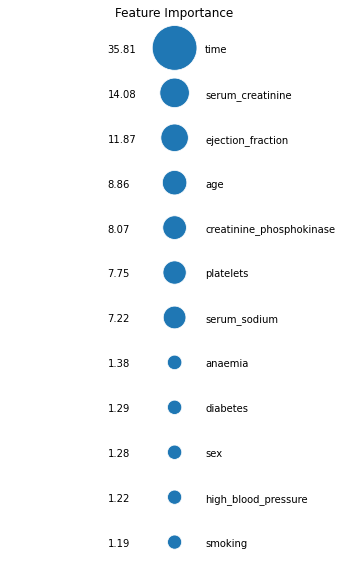

In [25]:
rf = RandomForestClassifier(n_estimators=5000,random_state=11)
rf.fit(x,y)
feat_imp = pd.DataFrame(rf.feature_importances_)
feat_imp.index = pd.Series(data.iloc[:,:-1].columns)
feat_imp = (feat_imp*100).copy().sort_values(by=0,ascending=False)
feat_imp = feat_imp.reset_index()
feat_imp.columns = ["Feature","Importance_score"]

fig = plt.figure(figsize=(6,10))
sns.scatterplot(data=feat_imp,x=5,y=np.linspace(100,0,12),size="Importance_score",sizes=(200,2000),legend=False)
for i,feat,imp in zip(np.linspace(100,0,12),feat_imp["Feature"],feat_imp["Importance_score"]):
    plt.text(x=5.05,y=i-1,s=feat)
    plt.text(x=4.89,y=i-1,s=np.round(imp,2))
plt.axis("off")
plt.title("Feature Importance")
plt.show()

### Correlation matrix heatmap

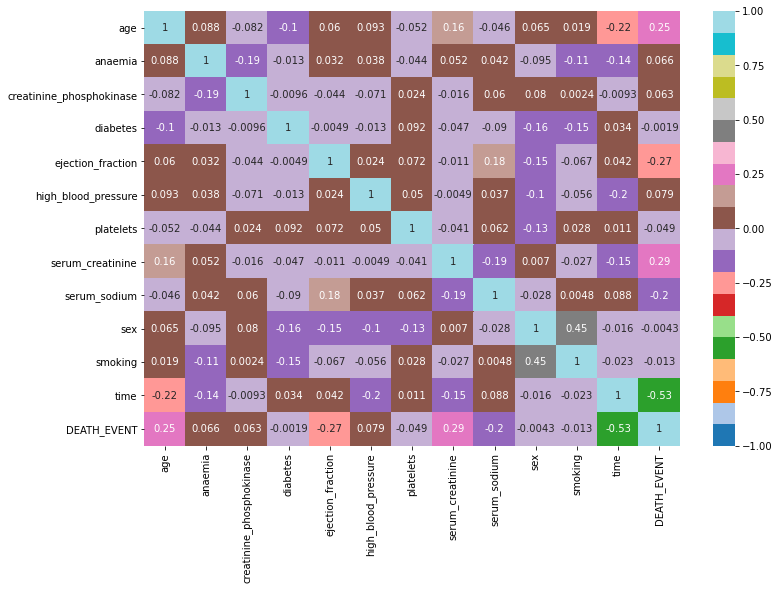

In [26]:
corr=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmin=-1, cmap='tab20', annot=True);

In [27]:
# attributes with correlation greater than 0.1 will be considered significant
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

### Extra Trees classifier

[0.09319313 0.02566448 0.07875289 0.0314001  0.13229951 0.02274709
 0.07089978 0.12305594 0.08158094 0.02601293 0.02821797 0.28617525]


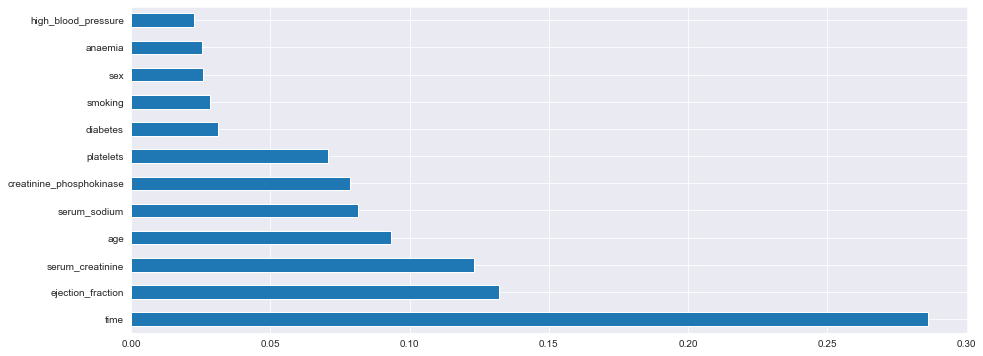

In [28]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

#### Five features with highest correlation have been selected, namely:
age, ejection_fraction, serum_creatinine, serum_sodium, time

In [29]:
# defining the features selected for further analysis

features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

In [30]:
features

['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

# Exploratory Data Analysis

### Pair plot for multivariate analysis

<Figure size 2160x2160 with 0 Axes>

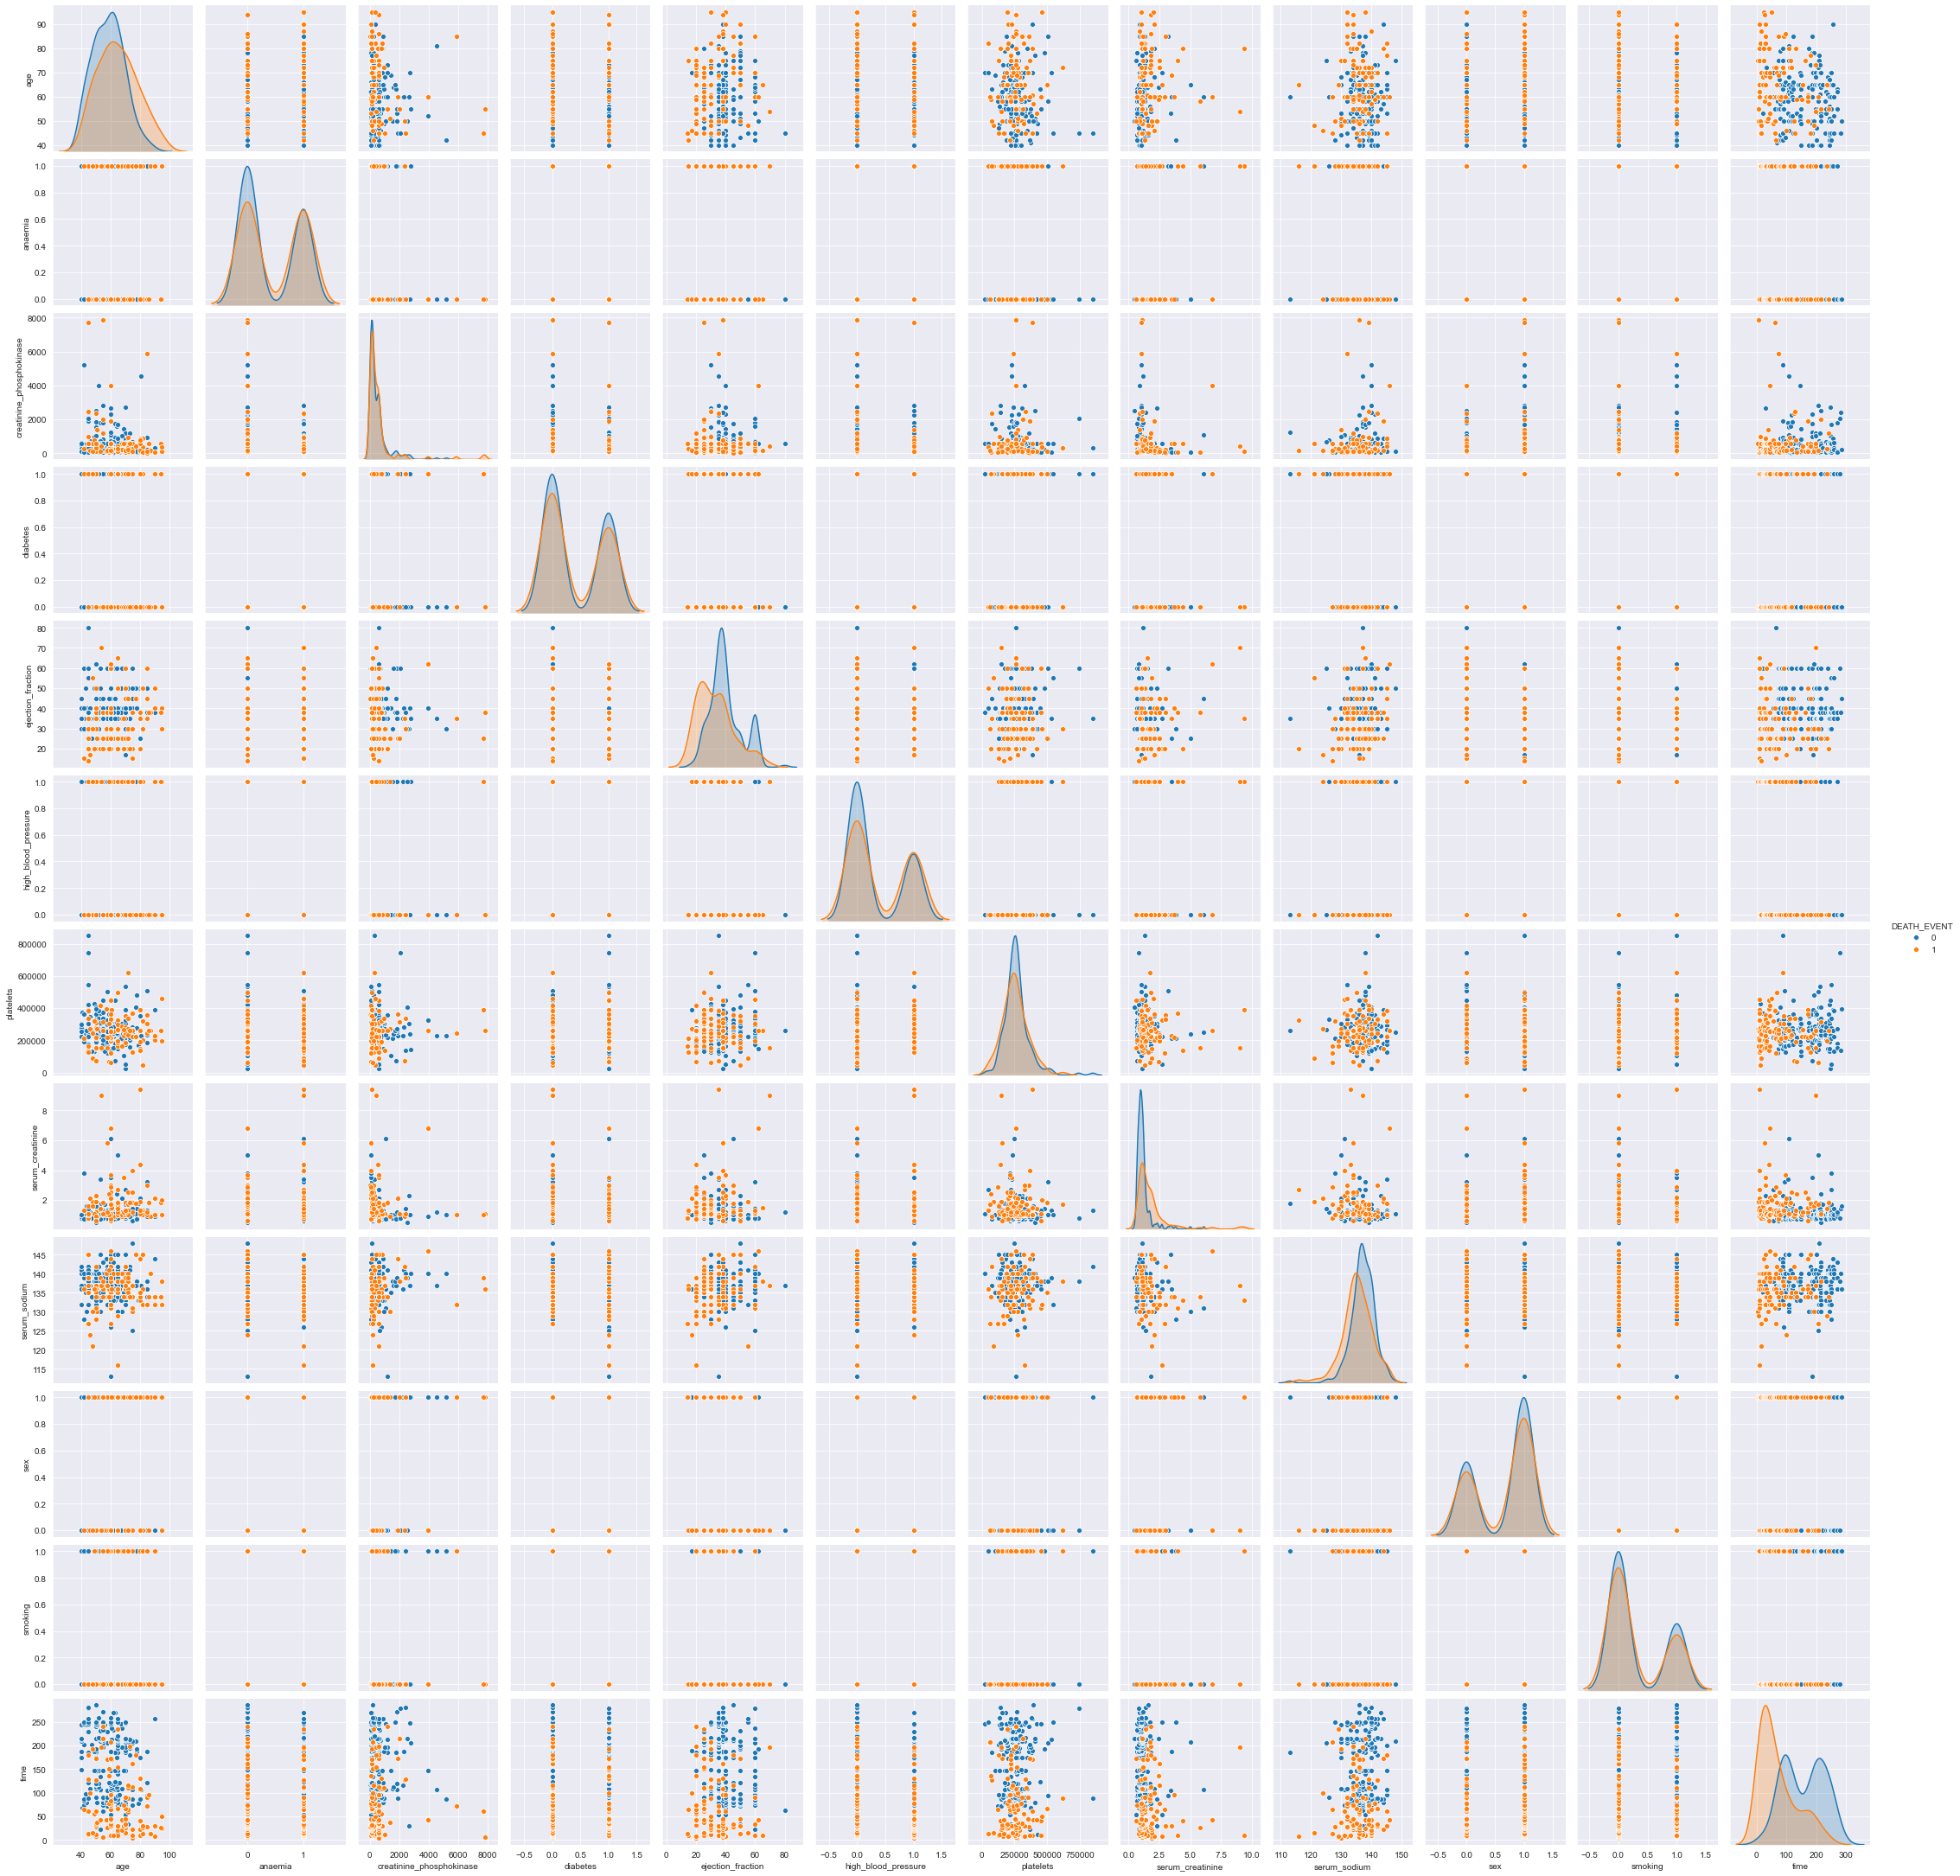

In [31]:
plt.figure(figsize = (30,30))
sns.pairplot(data,hue = 'DEATH_EVENT')

### Bar plot of categorical attributes

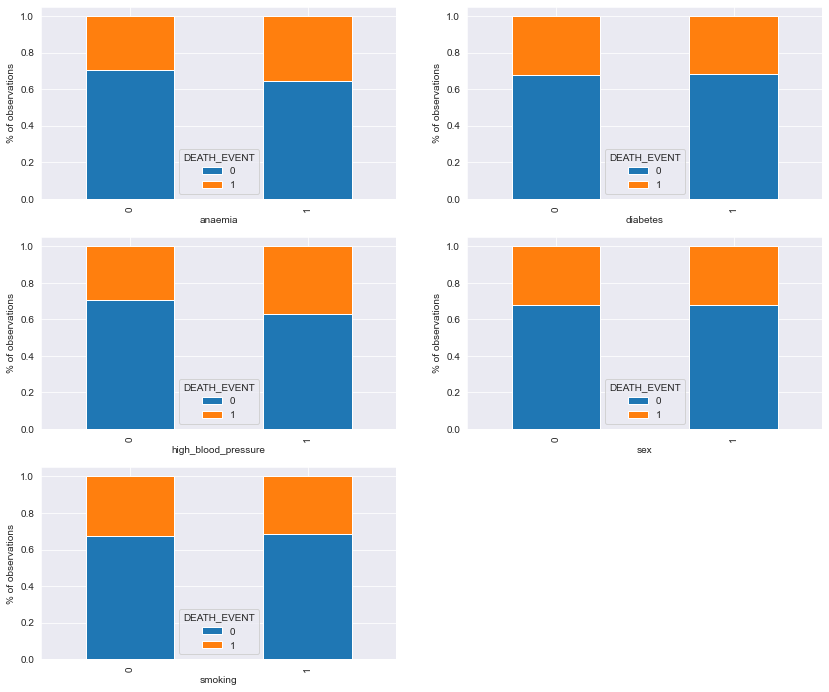

In [32]:
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(14,12))
for n,i in enumerate(cat_features[:-1]):
    ct = pd.crosstab(columns=data[i],index=data["DEATH_EVENT"],normalize="columns")
    ct.T.plot(kind="bar",stacked=True,ax=ax[r,c])
    ax[r,c].set_ylabel("% of observations")
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

### Pie chart of categorical attributes

In [33]:
test_yes = data[data['anaemia']==1]
test_no = data[data['anaemia']==0]

test_yes_survi = test_yes[data["DEATH_EVENT"]==0]
test_yes_not_survi = test_yes[data["DEATH_EVENT"]==1]
test_no_survi = test_no[data["DEATH_EVENT"]==0]
test_no_not_survi = test_no[data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia No - Not Survived']
values = [len(test_yes[data["DEATH_EVENT"]==0]),len(test_yes[data["DEATH_EVENT"]==1]),
         len(test_no[data["DEATH_EVENT"]==0]),len(test_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

In [34]:
test_yes = data[data['diabetes']==1]
test_no = data[data['diabetes']==0]

test_yes_survi = test_yes[data["DEATH_EVENT"]==0]
test_yes_not_survi = test_yes[data["DEATH_EVENT"]==1]
test_no_survi = test_no[data["DEATH_EVENT"]==0]
test_no_not_survi = test_no[data["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes No - Survived', 'Diabetes No - Not Survived']
values = [len(test_yes[data["DEATH_EVENT"]==0]),len(test_yes[data["DEATH_EVENT"]==1]),
         len(test_no[data["DEATH_EVENT"]==0]),len(test_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

In [35]:
test_yes = data[data['high_blood_pressure']==1]
test_no = data[data['high_blood_pressure']==0]

test_yes_survi = test_yes[data["DEATH_EVENT"]==0]
test_yes_not_survi = test_yes[data["DEATH_EVENT"]==1]
test_no_survi = test_no[data["DEATH_EVENT"]==0]
test_no_not_survi = test_no[data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP No - Not Survived']
values = [len(test_yes[data["DEATH_EVENT"]==0]),len(test_yes[data["DEATH_EVENT"]==1]),
         len(test_no[data["DEATH_EVENT"]==0]),len(test_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP")
fig.show()

In [36]:
test_yes = data[data['sex']==1]
test_no = data[data['sex']==0]

test_yes_survi = test_yes[data["DEATH_EVENT"]==0]
test_yes_not_survi = test_yes[data["DEATH_EVENT"]==1]
test_no_survi = test_no[data["DEATH_EVENT"]==0]
test_no_not_survi = test_no[data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', 'Female - Survived', 'Female - Not Survived']
values = [len(test_yes[data["DEATH_EVENT"]==0]),len(test_yes[data["DEATH_EVENT"]==1]),
         len(test_no[data["DEATH_EVENT"]==0]),len(test_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Sex")
fig.show()

In [37]:
test_yes = data[data['smoking']==1]
test_no = data[data['smoking']==0]

test_yes_survi = test_yes[data["DEATH_EVENT"]==0]
test_yes_not_survi = test_yes[data["DEATH_EVENT"]==1]
test_no_survi = test_no[data["DEATH_EVENT"]==0]
test_no_not_survi = test_no[data["DEATH_EVENT"]==1]

labels = ['Smoker - Survived','Smoker - Not Survived', 'Non-smoker - Survived', 'Non-smoker - Not Survived']
values = [len(test_yes[data["DEATH_EVENT"]==0]),len(test_yes[data["DEATH_EVENT"]==1]),
         len(test_no[data["DEATH_EVENT"]==0]),len(test_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

### Histogram of numerical attributes

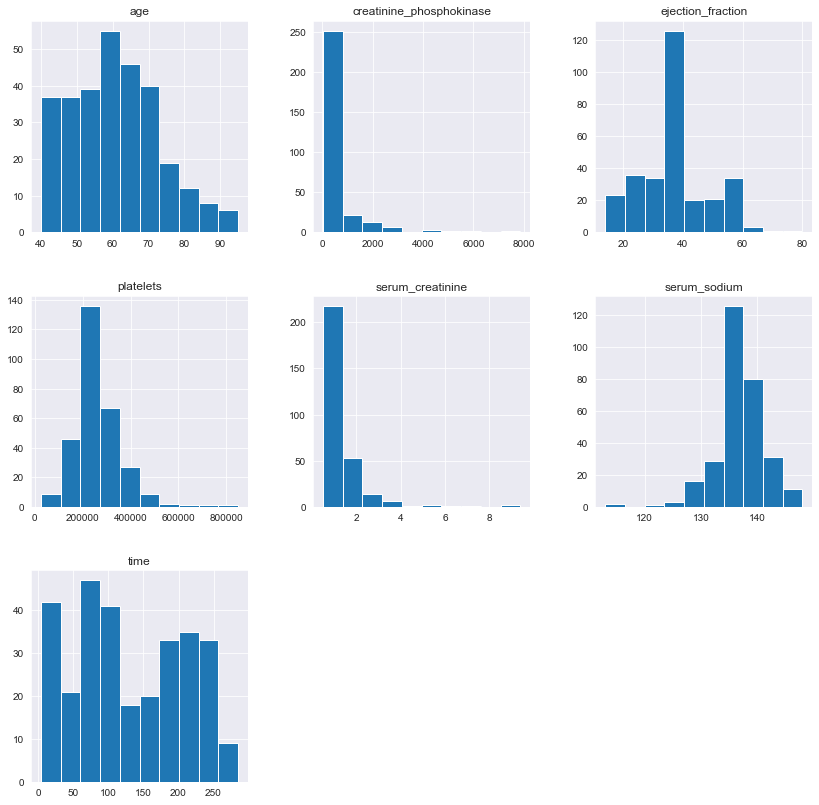

In [38]:
data[num_features].hist(figsize=(14,14))
plt.show();

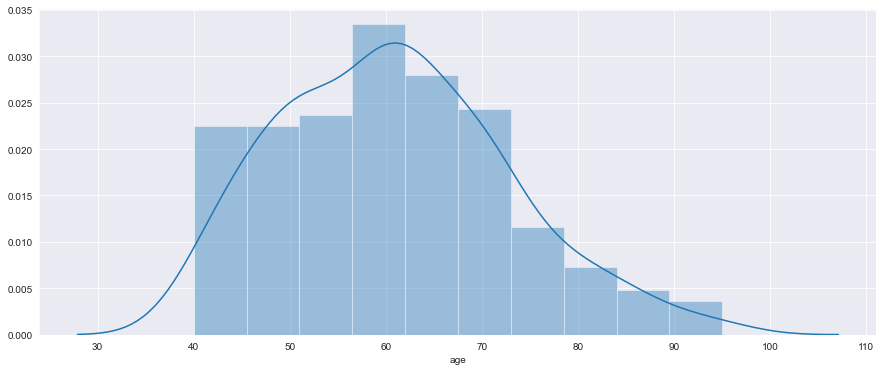

In [39]:
sns.distplot(data['age'])

### Histogram & Violin plot of selected features

In [40]:
for i in range(0,len(features)):
    fig = px.histogram(data, x=features[i], color="DEATH_EVENT", marginal="violin", hover_data=data.columns, 
                       color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}, width=800, height=350)
    fig.show()

### KDE plot of the highest correlated feature

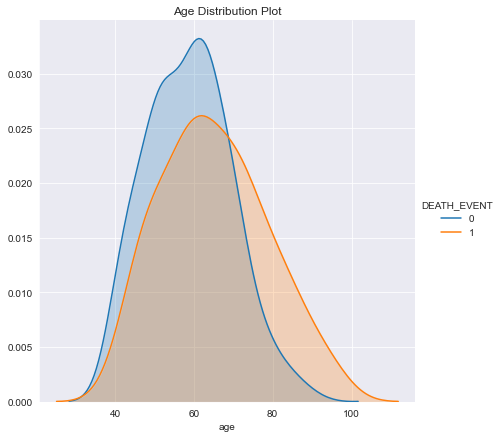

In [41]:
sns.FacetGrid(data, hue="DEATH_EVENT", height=6,).map(sns.kdeplot, "age",shade=True).add_legend()
plt.title('Age Distribution Plot')
plt.show()

### Correlation matrix heatmap

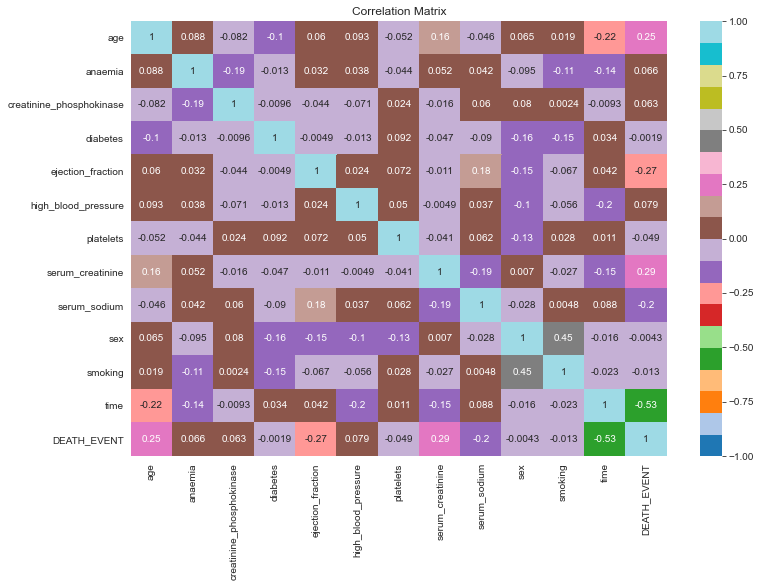

In [42]:
corr=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmin=-1, cmap='tab20', annot=True);
plt.title('Correlation Matrix')
plt.show()

### PPS Matrix heatmap

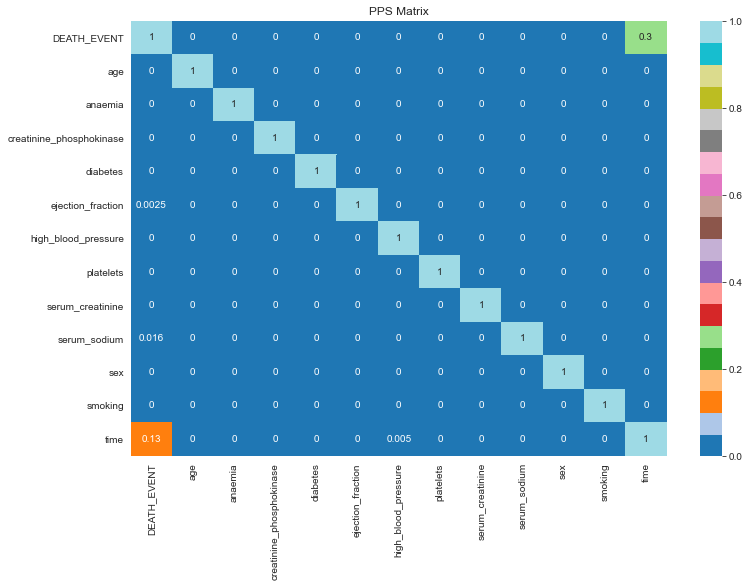

In [43]:
pps_data = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(12,8))
ax = sns.heatmap(pps_data, vmin=0, vmax=1, cmap="tab20", annot=True)
ax.set(xlabel=None, ylabel=None)
plt.title('PPS Matrix')
plt.show()

# Data Modelling

### Finding outliers

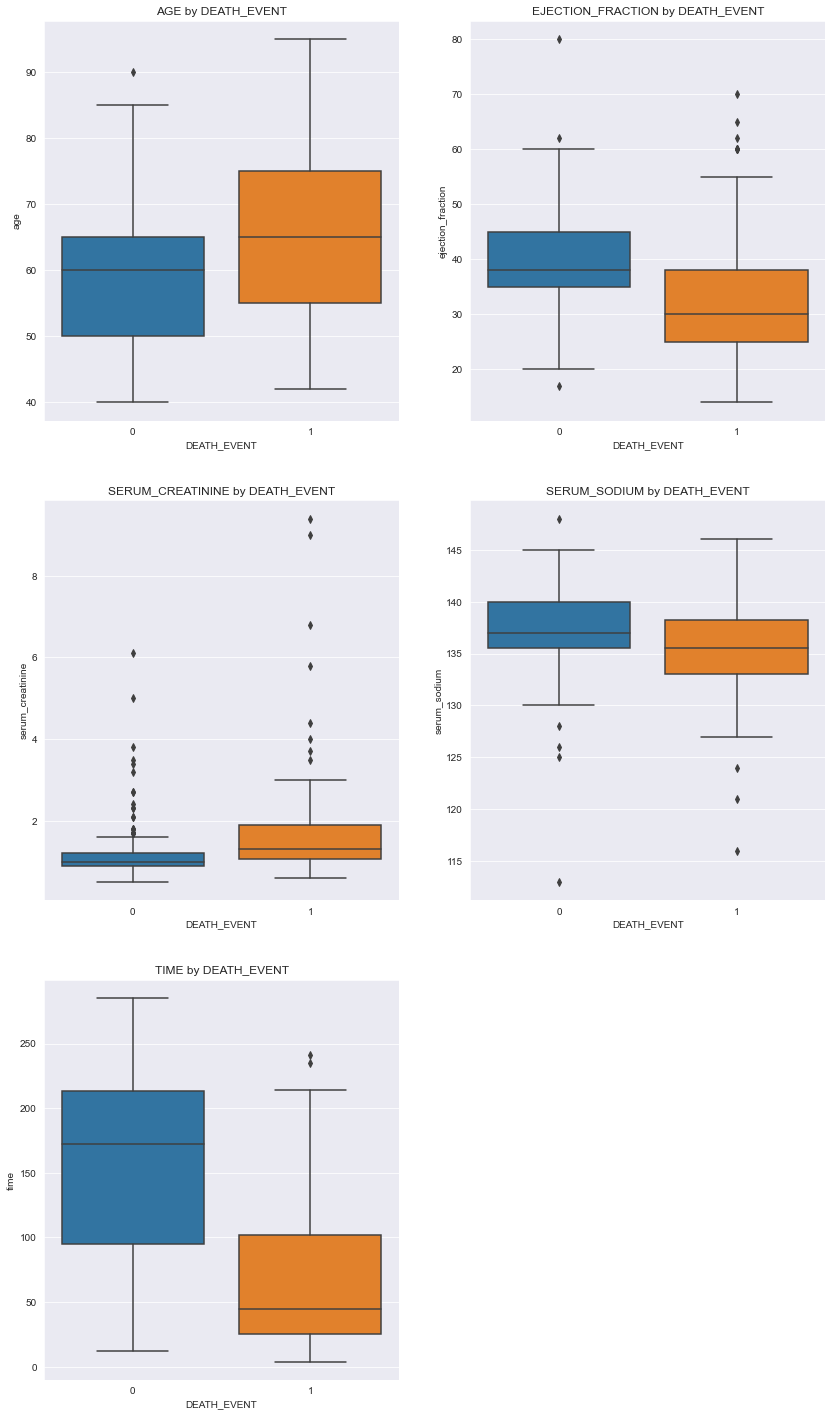

In [44]:
# Box plot of numerical attributes to find outliers
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(14,25))
for n,i in enumerate(features):
    sns.boxplot(x="DEATH_EVENT",y=i,data=data,ax=ax[r,c])
    ax[r,c].set_title(i.upper()+" by "+"DEATH_EVENT")
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

### Removing outliers

Removing the outliers might result in improved statistics but it may lead to overfitting.

#### Since this is a medical dataset, the outliers might be an important deciding factor. All the data points included in the dataset fall under medically permissible values, so they are not really outliers.

### Train-Test split

In [45]:
# 'features' have been defined previously

x = data[features]
y = data['DEATH_EVENT']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)
# Pareto principle (80/20 split)

### StandardScaler

It removes the mean and scales each feature/variable to unit variance, i.e, standardizes the data.

In [47]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [48]:
x_train = x_train_sc
x_test = x_test_sc

### Oversampling using SMOTE

This helps us to overcome class imbalancement and improve the accuracy.

In [49]:
smote = SMOTE(random_state = 10) 
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [50]:
x_train = x_train_smote
y_train = y_train_smote

# Classification Models

In [51]:
# for generating the barplot for comparison of different models
accuracy_list = []
precision_list = []
f1_list = []
recall_list = []

## Linear algorithms

### Logistic Regression

In [52]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

accuracy_list.append(100*log_reg_acc)
# print("Accuracy of Logistic Regression is: ", "{:.2f}%".format(100* log_reg_acc))

In [53]:
log_reg_prec = precision_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
precision_list.append(100*log_reg_prec)
f1_list.append(100*log_reg_f1)
recall_list.append(100*log_reg_recall)
# print("Precision score of Logistic Regression is: ", "{:.2f}%".format(100* log_reg_prec))
# print("F1 score of Logistic Regression is: ", "{:.2f}%".format(100* log_reg_f1))
# print("Recall score of Logistic Regression is: ", "{:.2f}%".format(100* log_reg_recall))

In [54]:
print("Classification report of Logistic Regression is:")
print("------------------------------------------------\n")
print(classification_report(y_test, log_reg_pred))

Classification report of Logistic Regression is:
------------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        43
           1       0.50      0.76      0.60        17

    accuracy                           0.72        60
   macro avg       0.69      0.73      0.69        60
weighted avg       0.77      0.72      0.73        60



<Figure size 1080x432 with 0 Axes>

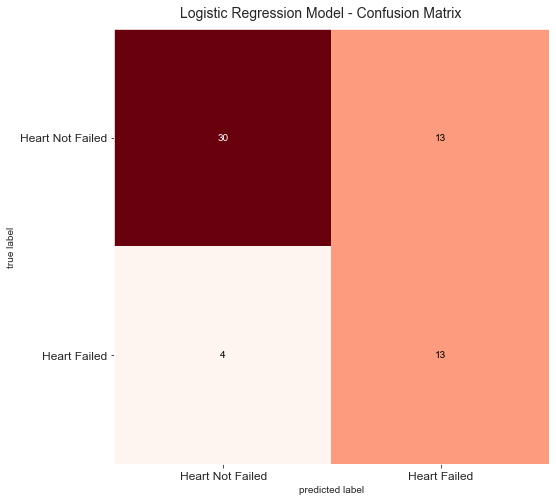

In [55]:
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
# print(log_reg_cm)

plt.figure()
plot_confusion_matrix(log_reg_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"Logistic Regression Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

### Support Vector Machine/SVM

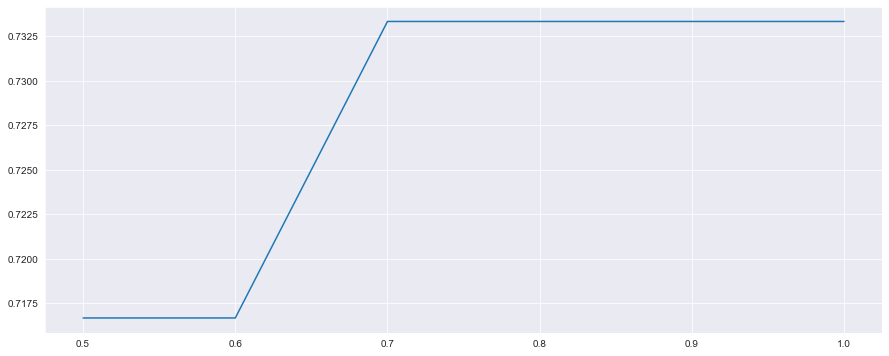

In [56]:
# finding optimum value of 'c' parameter
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [57]:
sv_clf = SVC(C = 0.7, random_state=1, kernel = 'rbf')   # highest accuracy at and around c=0.7
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)

accuracy_list.append(100* sv_clf_acc)
# print("Accuracy of SVM is: ", "{:.2f}%".format(100* sv_clf_acc))

In [58]:
sv_clf_prec = precision_score(y_test, sv_clf_pred)
sv_clf_f1 = f1_score(y_test, sv_clf_pred)
sv_clf_recall = recall_score(y_test, sv_clf_pred)
precision_list.append(100*sv_clf_prec)
f1_list.append(100*sv_clf_f1)
recall_list.append(100*sv_clf_recall)
# print("Precision score of SVM is: ", "{:.2f}%".format(100* sv_clf_prec))
# print("F1 score of SVM is: ", "{:.2f}%".format(100* sv_clf_f1))
# print("Recall score of SVM is: ", "{:.2f}%".format(100* sv_clf_recall))

In [59]:
print("Classification report of SVM is:")
print("--------------------------------\n")
print(classification_report(y_test, sv_clf_pred))

Classification report of SVM is:
--------------------------------

              precision    recall  f1-score   support

           0       0.89      0.72      0.79        43
           1       0.52      0.76      0.62        17

    accuracy                           0.73        60
   macro avg       0.70      0.74      0.71        60
weighted avg       0.78      0.73      0.75        60



<Figure size 1080x432 with 0 Axes>

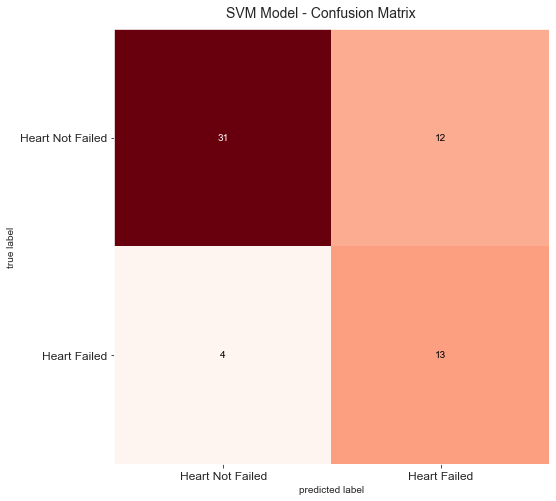

In [60]:
sv_clf_cm = confusion_matrix(y_test, sv_clf_pred)
# print(sv_clf_cm)

plt.figure()
plot_confusion_matrix(sv_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"SVM Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

## Non-linear algorithms

### k-Nearest Neighbour/KNN

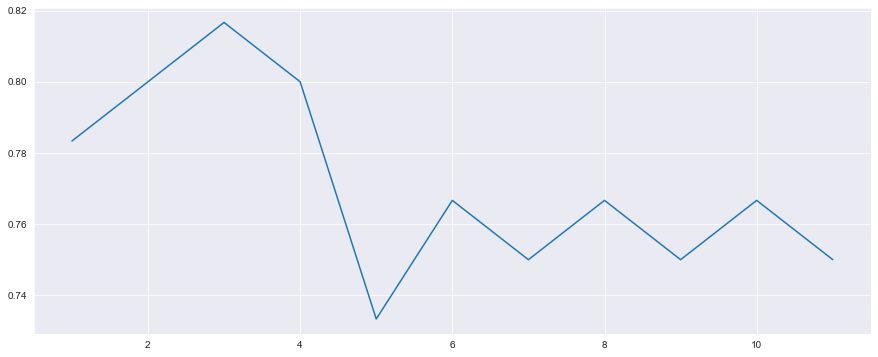

In [61]:
# finding optimum number of neighbours
list1 = []
for neighbors in range(1,12):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,12)), list1)
plt.show()

In [62]:
kn_clf = KNeighborsClassifier(n_neighbors=3)   # highest accuracy at k=3
kn_clf.fit(x_train, y_train)
kn_clf_pred = kn_clf.predict(x_test)
kn_clf_acc = accuracy_score(y_test, kn_clf_pred)

accuracy_list.append(100*kn_clf_acc)
# print("Accuracy of KNN is: ", "{:.2f}%".format(100* kn_clf_acc))

In [63]:
kn_clf_prec = precision_score(y_test, kn_clf_pred)
kn_clf_f1 = f1_score(y_test, kn_clf_pred)
kn_clf_recall = recall_score(y_test, kn_clf_pred)
precision_list.append(100*kn_clf_prec)
f1_list.append(100*kn_clf_f1)
recall_list.append(100*kn_clf_recall)
# print("Precision score of KNN is: ", "{:.2f}%".format(100* kn_clf_prec))
# print("F1 score of KNN is: ", "{:.2f}%".format(100* kn_clf_f1))
# print("Recall score of KNN is: ", "{:.2f}%".format(100* kn_clf_recall))

In [64]:
print("Classification report of KNN is:")
print("--------------------------------\n")
print(classification_report(y_test, kn_clf_pred))

Classification report of KNN is:
--------------------------------

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.64      0.82      0.72        17

    accuracy                           0.82        60
   macro avg       0.78      0.82      0.79        60
weighted avg       0.84      0.82      0.82        60



<Figure size 1080x432 with 0 Axes>

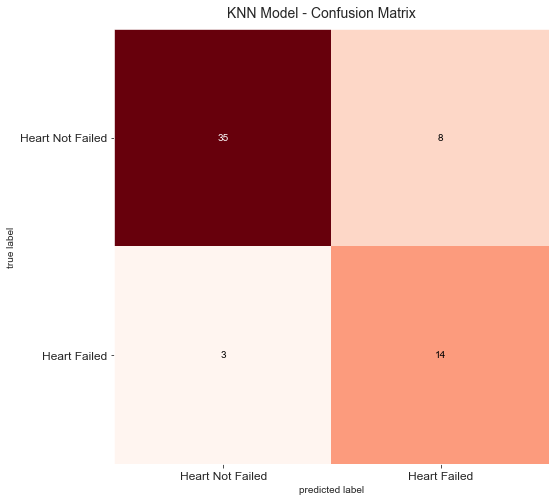

In [65]:
kn_clf_cm = confusion_matrix(y_test, kn_clf_pred)
# print(kn_clf_cm)

plt.figure()
plot_confusion_matrix(kn_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"KNN Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

## Tree-based algorithms

### Decision Tree Classifier

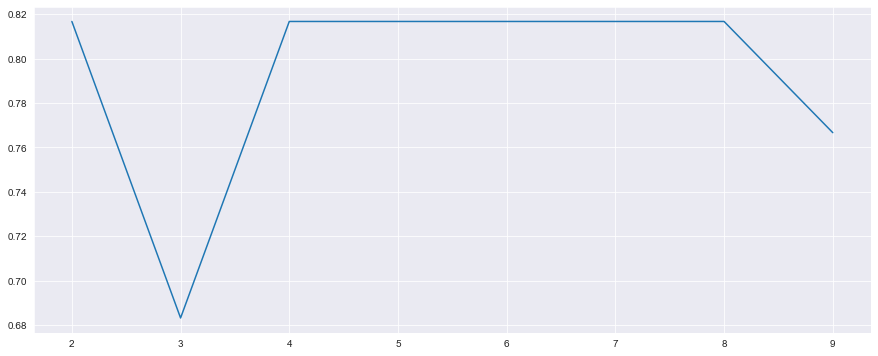

In [66]:
# finding optimum number of leaf nodes
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(2,10)), list1)
plt.show()

In [67]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=1, criterion='entropy')    # highest accuracy till at and around nodes=4
dt_clf.fit(x_train, y_train)
dt_clf_pred = dt_clf.predict(x_test)
dt_clf_acc = accuracy_score(y_test, dt_clf_pred)

accuracy_list.append(100*dt_clf_acc)
# print("Accuracy of Decision Tree is: ", "{:.2f}%".format(100* dt_clf_acc))

In [68]:
dt_clf_prec = precision_score(y_test, dt_clf_pred)
dt_clf_f1 = f1_score(y_test, dt_clf_pred)
dt_clf_recall = recall_score(y_test, dt_clf_pred)
precision_list.append(100*dt_clf_prec)
f1_list.append(100*dt_clf_f1)
recall_list.append(100*dt_clf_recall)
# print("Precision score of Decision Tree is: ", "{:.2f}%".format(100* dt_clf_prec))
# print("F1 score of Decision Tree is: ", "{:.2f}%".format(100* dt_clf_f1))
# print("Recall score of Decision Tree is: ", "{:.2f}%".format(100* dt_clf_recall))

In [69]:
print("Classification report of Decision Tree is:")
print("------------------------------------------\n")
print(classification_report(y_test, dt_clf_pred))

Classification report of Decision Tree is:
------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.71      0.59      0.65        17

    accuracy                           0.82        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.81      0.82      0.81        60



<Figure size 1080x432 with 0 Axes>

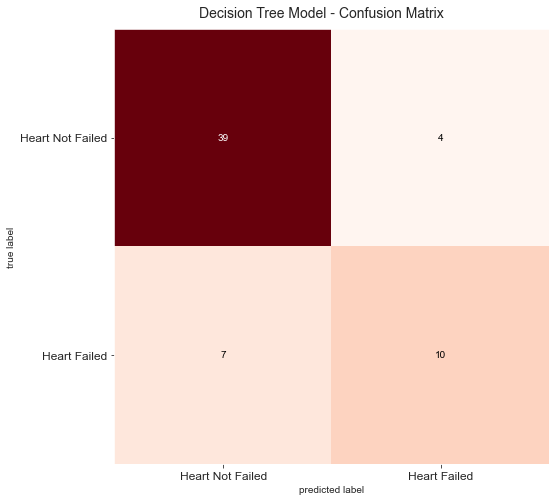

In [70]:
dt_clf_cm = confusion_matrix(y_test, dt_clf_pred)
# print(dt_clf_cm)

plt.figure()
plot_confusion_matrix(dt_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"Decision Tree Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

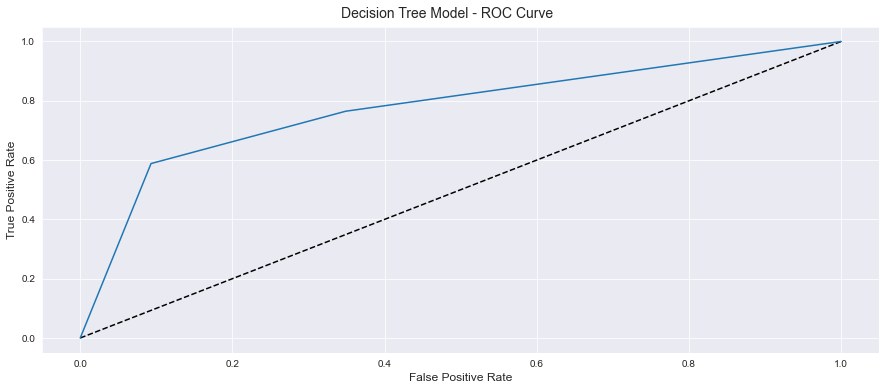

In [71]:
# predict diagnostic ability of a binary outcome
dt_clf_prob = dt_clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, dt_clf_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.figtext(0.5,0.9,"Decision Tree Model - ROC Curve", fontsize=14, ha='center')
plt.show()

### Random Forest Classifier

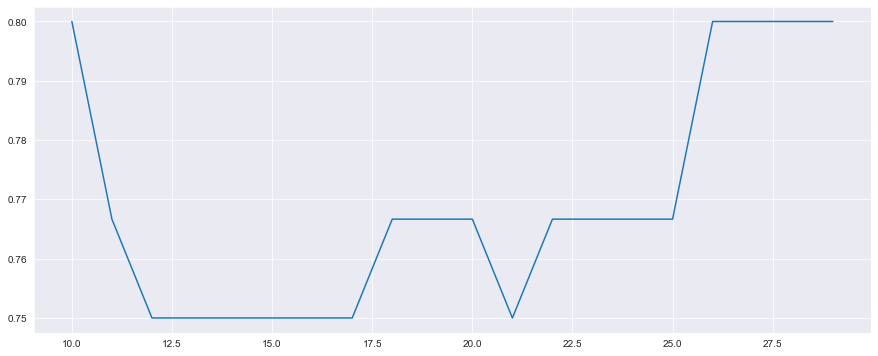

In [72]:
# finding optimum number of n_estimators
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(10,30)), list1)
plt.show()

In [73]:
rf_clf = RandomForestClassifier(n_estimators = 28, criterion='entropy', random_state=1)   # highest accuracy at n=28
rf_clf.fit(x_train, y_train)
rf_clf_pred = rf_clf.predict(x_test)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)

accuracy_list.append(100*rf_clf_acc)
# print("Accuracy of Random Forest is: ", "{:.2f}%".format(100* rf_clf_acc))

In [74]:
rf_clf_prec = precision_score(y_test, rf_clf_pred)
rf_clf_f1 = f1_score(y_test, rf_clf_pred)
rf_clf_recall = recall_score(y_test, rf_clf_pred)
precision_list.append(100*rf_clf_prec)
f1_list.append(100*rf_clf_f1)
recall_list.append(100*rf_clf_recall)
# print("Precision score of Random Forest is: ", "{:.2f}%".format(100* rf_clf_prec))
# print("F1 score of Random Forest is: ", "{:.2f}%".format(100* rf_clf_f1))
# print("Recall score of Random Forest is: ", "{:.2f}%".format(100* rf_clf_recall))

In [75]:
print("Classification report of Random Forest is:")
print("------------------------------------------\n")
print(classification_report(y_test, rf_clf_pred))

Classification report of Random Forest is:
------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.63      0.71      0.67        17

    accuracy                           0.80        60
   macro avg       0.75      0.77      0.76        60
weighted avg       0.81      0.80      0.80        60



<Figure size 1080x432 with 0 Axes>

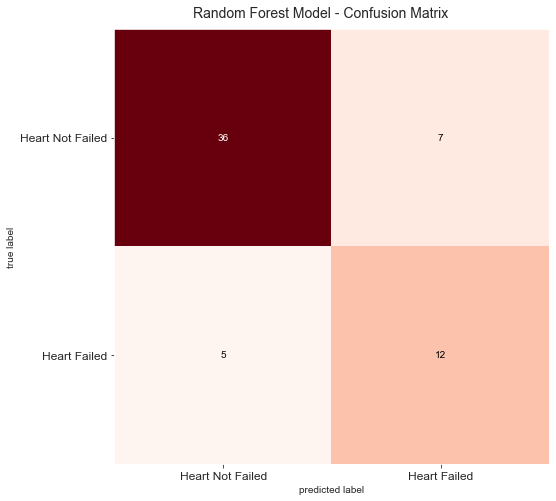

In [76]:
rf_clf_cm = confusion_matrix(y_test, rf_clf_pred)
# print(rf_clf_cm)

plt.figure()
plot_confusion_matrix(rf_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"Random Forest Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

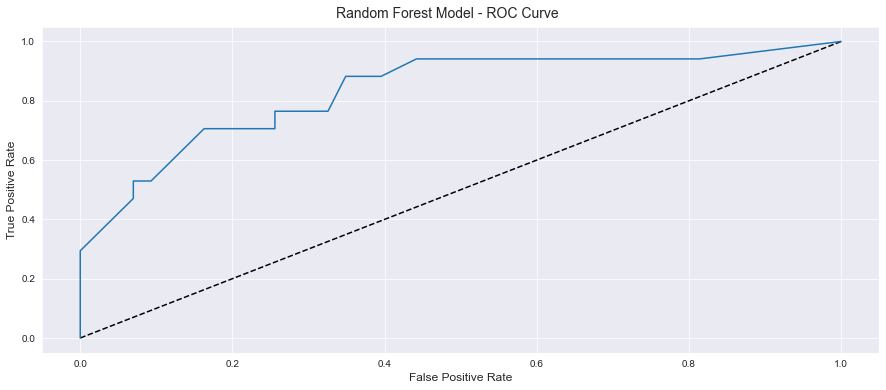

In [77]:
# predict diagnostic ability of a binary outcome
rf_clf_prob = rf_clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_clf_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.figtext(0.5,0.9,"Random Forest Model - ROC Curve", fontsize=14, ha='center')
plt.show()

ROC score of Random Forest is much better than Decision Tree, since greater area is covered under the curve.

## Boosting algorithms

#### Boosting techniques are used for fine tuning the accuracy.

Boosting is a general ensemble method to create a strong classifier from a number of weak classifiers by building a model from the training data, then creating a second model that attempts to correct the errors of the first model.

### Gradient Boosting/GBM

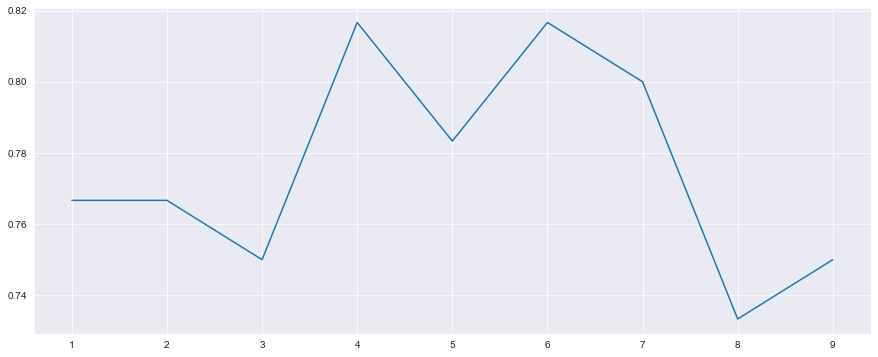

In [78]:
# finding optimum depth
list1 = []
for depth in range(1,10):
    classifier = GradientBoostingClassifier(max_depth = depth, random_state=0)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,10)), list1)
plt.show()

In [79]:
gbm_clf = GradientBoostingClassifier(max_depth=6, random_state=1)   # highest accuracy at and around depth=6
gbm_clf.fit(x_train,y_train)
gbm_clf_pred = gbm_clf.predict(x_test)
gbm_clf_acc = accuracy_score(y_test, gbm_clf_pred)

accuracy_list.append(100*gbm_clf_acc)
# print("Accuracy of Gradient Boosting is: ", "{:.2f}%".format(100* gbm_clf_acc))

In [80]:
gbm_clf_prec = precision_score(y_test, gbm_clf_pred)
gbm_clf_f1 = f1_score(y_test, gbm_clf_pred)
gbm_clf_recall = recall_score(y_test, gbm_clf_pred)
precision_list.append(100*gbm_clf_prec)
f1_list.append(100*gbm_clf_f1)
recall_list.append(100*gbm_clf_recall)
# print("Precision score of Gradient Boosting is: ", "{:.2f}%".format(100* gbm_clf_prec))
# print("F1 score of Gradient Boosting is: ", "{:.2f}%".format(100* gbm_clf_f1))
# print("Recall score of Gradient Boosting is: ", "{:.2f}%".format(100* gbm_clf_recall))

In [81]:
print("Classification report of Gradient Boosting is:")
print("----------------------------------------------\n")
print(classification_report(y_test, gbm_clf_pred))

Classification report of Gradient Boosting is:
----------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.71      0.71      0.71        17

    accuracy                           0.83        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.83      0.83      0.83        60



<Figure size 1080x432 with 0 Axes>

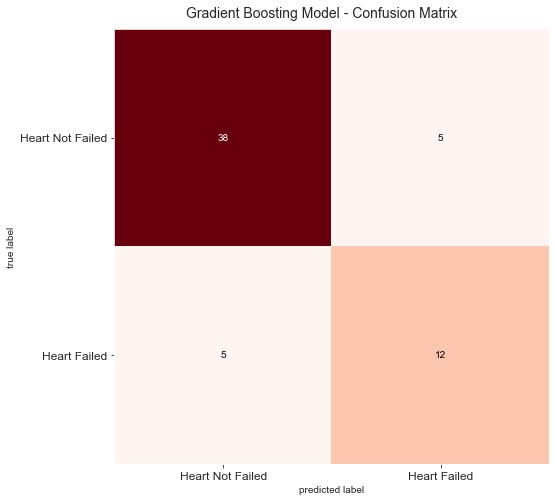

In [82]:
gbm_clf_cm = confusion_matrix(y_test, gbm_clf_pred)
# print(gbm_clf_cm)

plt.figure()
plot_confusion_matrix(gbm_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"Gradient Boosting Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

### Extreme Gradient Boosting/XGBM

In [83]:
# finding optimum no. of n_estimators
list1 = []
for estimators in range(10,30):
    classifier = XGBClassifier(objective="binary:logistic", n_estimators=estimators, random_state=0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

[00:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

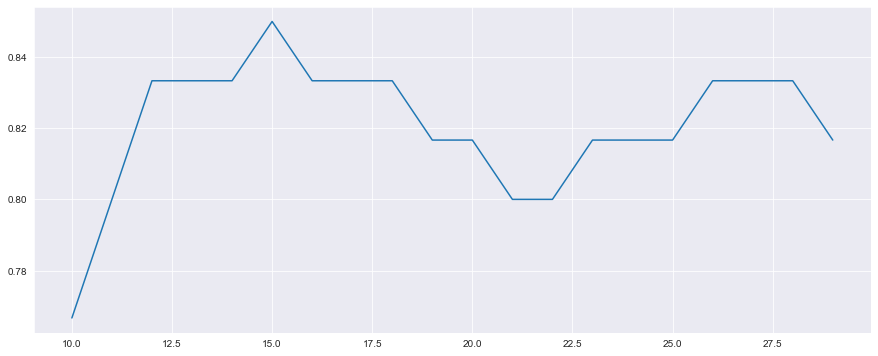

In [84]:
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [85]:
xgb_clf = XGBClassifier(objective="binary:logistic", n_estimators=15, random_state=1)   # highest accuracy at n=15
xgb_clf.fit(x_train,y_train)
xgb_clf_pred = xgb_clf.predict(x_test)
xgb_clf_acc = accuracy_score(y_test, xgb_clf_pred)

accuracy_list.append(100*xgb_clf_acc)
# print("Accuracy of XGBM is: ", "{:.2f}%".format(100* xgb_clf_acc))

[00:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [86]:
xgb_clf_prec = precision_score(y_test, xgb_clf_pred)
xgb_clf_f1 = f1_score(y_test, xgb_clf_pred)
xgb_clf_recall = recall_score(y_test, xgb_clf_pred)
precision_list.append(100*xgb_clf_prec)
f1_list.append(100*xgb_clf_f1)
recall_list.append(100*xgb_clf_recall)
# print("Precision score of XGBM is: ", "{:.2f}%".format(100* xgb_clf_prec))
# print("F1 score of XGBM is: ", "{:.2f}%".format(100* xgb_clf_f1))
# print("Recall score of XGBM is: ", "{:.2f}%".format(100* xgb_clf_recall))

In [87]:
print("Classification report of XGBM is:")
print("----------------------------------------------------\n")
print(classification_report(y_test, xgb_clf_pred))

Classification report of XGBM is:
----------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.70      0.82      0.76        17

    accuracy                           0.85        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.86      0.85      0.85        60



<Figure size 1080x432 with 0 Axes>

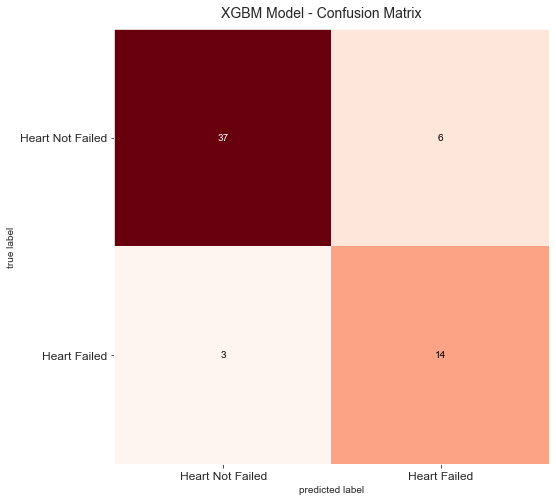

In [88]:
xgb_clf_cm = confusion_matrix(y_test, xgb_clf_pred)
# print(xgb_clf_cm)

plt.figure()
plot_confusion_matrix(xgb_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"XGBM Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

### XGBoost with Random Forest/XGBRF

In [89]:
# finding optimum depth
list1 = []
for depth in range(0,10):
    classifier = XGBRFClassifier(max_depth = depth, random_state=0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

[00:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

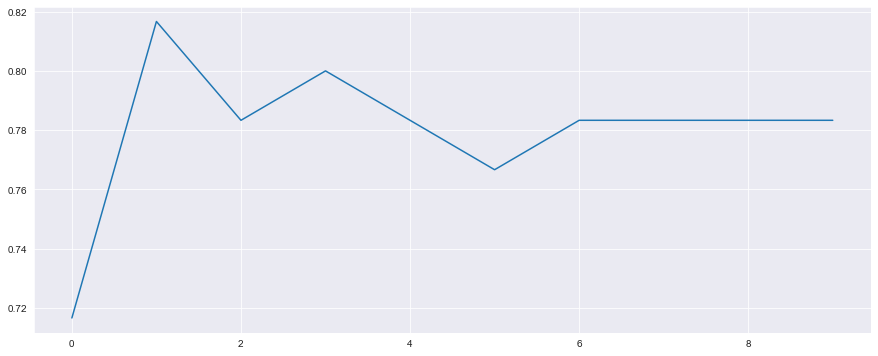

In [90]:
plt.plot(list(range(0,10)), list1)
plt.show()

In [91]:
xgbrf_clf = XGBRFClassifier(max_depth=1, random_state=1)   # highest accuracy at depth=1
xgbrf_clf.fit(x_train,y_train)
xgbrf_clf_pred = xgbrf_clf.predict(x_test)
xgbrf_clf_acc = accuracy_score(y_test, xgbrf_clf_pred)

accuracy_list.append(100*xgbrf_clf_acc)
# print("Accuracy of XGBRF is: ", "{:.2f}%".format(100* xgbrf_clf_acc))

[00:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
xgbrf_clf_prec = precision_score(y_test, xgbrf_clf_pred)
xgbrf_clf_f1 = f1_score(y_test, xgbrf_clf_pred)
xgbrf_clf_recall = recall_score(y_test, xgbrf_clf_pred)
precision_list.append(100*xgbrf_clf_prec)
f1_list.append(100*xgbrf_clf_f1)
recall_list.append(100*xgbrf_clf_recall)
# print("Precision score of XGBRF is: ", "{:.2f}%".format(100* xgbrf_clf_prec))
# print("F1 score of XGBRF is: ", "{:.2f}%".format(100* xgbrf_clf_f1))
# print("Recall score of XGBRF is: ", "{:.2f}%".format(100* xgbrf_clf_recall))

In [93]:
print("Classification report of XGBRF is:")
print("----------------------------------\n")
print(classification_report(y_test, xgbrf_clf_pred))

Classification report of XGBRF is:
----------------------------------

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.71      0.59      0.65        17

    accuracy                           0.82        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.81      0.82      0.81        60



<Figure size 1080x432 with 0 Axes>

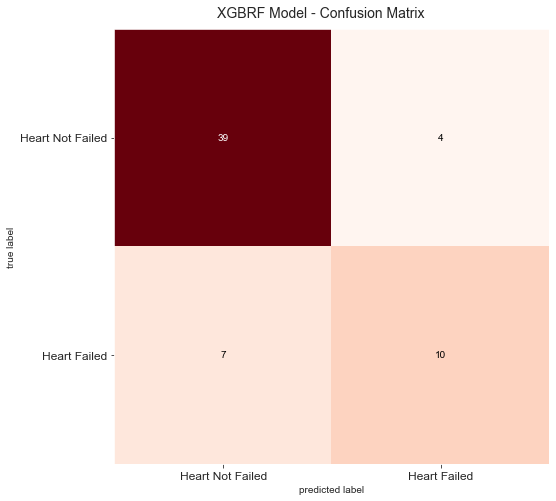

In [94]:
xgbrf_clf_cm = confusion_matrix(y_test, xgbrf_clf_pred)
# print(xgbrf_clf_cm)

plt.figure()
plot_confusion_matrix(xgbrf_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"XGBRF Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

### LightGBM/LGBM

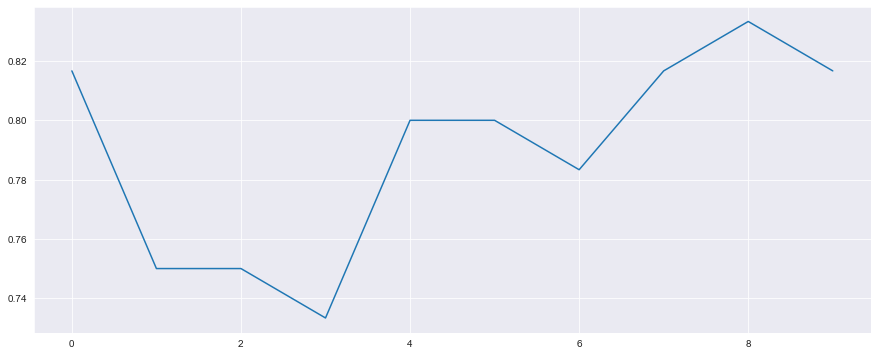

In [95]:
# finding optimum depth
list1 = []
for depth in range(0,10):
    classifier = LGBMClassifier(max_depth = depth, random_state=0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(0,10)), list1)
plt.show()

In [96]:
lgb_clf = LGBMClassifier(max_depth=8, random_state=1)   # highest accuracy at depth=8
lgb_clf.fit(x_train,y_train)
lgb_clf_pred = lgb_clf.predict(x_test)
lgb_clf_acc = accuracy_score(y_test, lgb_clf_pred)

accuracy_list.append(100*lgb_clf_acc)
# print("Accuracy of LightGBM is: ", "{:.2f}%".format(100* lgb_clf_acc))

In [97]:
lgb_clf_prec = precision_score(y_test, lgb_clf_pred)
lgb_clf_f1 = f1_score(y_test, lgb_clf_pred)
lgb_clf_recall = recall_score(y_test, lgb_clf_pred)
precision_list.append(100*lgb_clf_prec)
f1_list.append(100*lgb_clf_f1)
recall_list.append(100*lgb_clf_recall)
# print("Precision score of LightGBM is: ", "{:.2f}%".format(100* lgb_clf_prec))
# print("F1 score of LightGBM is: ", "{:.2f}%".format(100* lgb_clf_f1))
# print("Recall score of LightGBM is: ", "{:.2f}%".format(100* lgb_clf_recall))

In [98]:
print("Classification report of LightGBM is:")
print("-------------------------------------\n")
print(classification_report(y_test, lgb_clf_pred))

Classification report of LightGBM is:
-------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.67      0.82      0.74        17

    accuracy                           0.83        60
   macro avg       0.79      0.83      0.81        60
weighted avg       0.85      0.83      0.84        60



<Figure size 1080x432 with 0 Axes>

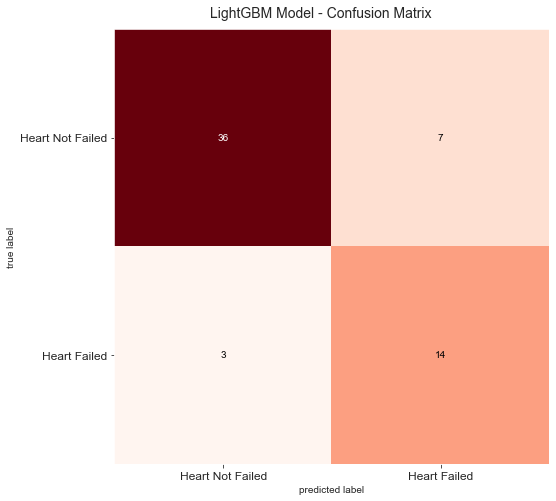

In [99]:
lgb_clf_cm = confusion_matrix(y_test, lgb_clf_pred)
# print(lgb_clf_cm)

plt.figure()
plot_confusion_matrix(lgb_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"LightGBM Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

### CatBoost Classifier

In [100]:
cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_clf_pred = cat_clf.predict(x_test)
cat_clf_acc = accuracy_score(y_test, cat_clf_pred)

accuracy_list.append(100*cat_clf_acc)
# print("Accuracy of CatBoost is: ", "{:.2f}%".format(100* cat_clf_acc))

Learning rate set to 0.006333
0:	learn: 0.6879159	total: 163ms	remaining: 2m 43s
1:	learn: 0.6828235	total: 165ms	remaining: 1m 22s
2:	learn: 0.6764401	total: 166ms	remaining: 55.2s
3:	learn: 0.6715648	total: 167ms	remaining: 41.7s
4:	learn: 0.6662191	total: 169ms	remaining: 33.6s
5:	learn: 0.6612778	total: 170ms	remaining: 28.1s
6:	learn: 0.6557205	total: 171ms	remaining: 24.3s
7:	learn: 0.6502728	total: 172ms	remaining: 21.3s
8:	learn: 0.6454907	total: 173ms	remaining: 19.1s
9:	learn: 0.6395156	total: 175ms	remaining: 17.3s
10:	learn: 0.6349050	total: 176ms	remaining: 15.8s
11:	learn: 0.6303726	total: 177ms	remaining: 14.6s
12:	learn: 0.6262271	total: 179ms	remaining: 13.6s
13:	learn: 0.6215044	total: 180ms	remaining: 12.7s
14:	learn: 0.6168600	total: 181ms	remaining: 11.9s
15:	learn: 0.6122480	total: 182ms	remaining: 11.2s
16:	learn: 0.6080648	total: 183ms	remaining: 10.6s
17:	learn: 0.6031875	total: 184ms	remaining: 10s
18:	learn: 0.5987729	total: 185ms	remaining: 9.56s
19:	learn: 

298:	learn: 0.2174173	total: 482ms	remaining: 1.13s
299:	learn: 0.2169927	total: 483ms	remaining: 1.13s
300:	learn: 0.2165791	total: 484ms	remaining: 1.13s
301:	learn: 0.2161889	total: 486ms	remaining: 1.12s
302:	learn: 0.2158202	total: 487ms	remaining: 1.12s
303:	learn: 0.2154537	total: 488ms	remaining: 1.12s
304:	learn: 0.2149195	total: 489ms	remaining: 1.11s
305:	learn: 0.2145532	total: 490ms	remaining: 1.11s
306:	learn: 0.2142044	total: 491ms	remaining: 1.11s
307:	learn: 0.2138268	total: 492ms	remaining: 1.1s
308:	learn: 0.2134811	total: 493ms	remaining: 1.1s
309:	learn: 0.2132342	total: 494ms	remaining: 1.1s
310:	learn: 0.2125793	total: 495ms	remaining: 1.1s
311:	learn: 0.2121069	total: 496ms	remaining: 1.09s
312:	learn: 0.2117065	total: 497ms	remaining: 1.09s
313:	learn: 0.2114178	total: 498ms	remaining: 1.09s
314:	learn: 0.2110400	total: 499ms	remaining: 1.08s
315:	learn: 0.2108102	total: 500ms	remaining: 1.08s
316:	learn: 0.2104309	total: 501ms	remaining: 1.08s
317:	learn: 0.20

557:	learn: 0.1454974	total: 783ms	remaining: 620ms
558:	learn: 0.1451369	total: 784ms	remaining: 619ms
559:	learn: 0.1450848	total: 785ms	remaining: 617ms
560:	learn: 0.1448703	total: 786ms	remaining: 615ms
561:	learn: 0.1446826	total: 788ms	remaining: 614ms
562:	learn: 0.1444253	total: 789ms	remaining: 612ms
563:	learn: 0.1442644	total: 790ms	remaining: 611ms
564:	learn: 0.1441539	total: 791ms	remaining: 609ms
565:	learn: 0.1440214	total: 792ms	remaining: 607ms
566:	learn: 0.1437619	total: 793ms	remaining: 606ms
567:	learn: 0.1435357	total: 794ms	remaining: 604ms
568:	learn: 0.1433149	total: 795ms	remaining: 603ms
569:	learn: 0.1431264	total: 797ms	remaining: 601ms
570:	learn: 0.1430190	total: 798ms	remaining: 599ms
571:	learn: 0.1428008	total: 799ms	remaining: 598ms
572:	learn: 0.1425677	total: 800ms	remaining: 596ms
573:	learn: 0.1424382	total: 801ms	remaining: 594ms
574:	learn: 0.1423408	total: 802ms	remaining: 593ms
575:	learn: 0.1420853	total: 803ms	remaining: 591ms
576:	learn: 

842:	learn: 0.1028777	total: 1.09s	remaining: 204ms
843:	learn: 0.1028116	total: 1.09s	remaining: 202ms
844:	learn: 0.1027269	total: 1.1s	remaining: 201ms
845:	learn: 0.1026024	total: 1.1s	remaining: 200ms
846:	learn: 0.1024704	total: 1.1s	remaining: 199ms
847:	learn: 0.1023575	total: 1.1s	remaining: 197ms
848:	learn: 0.1022697	total: 1.1s	remaining: 196ms
849:	learn: 0.1021905	total: 1.1s	remaining: 195ms
850:	learn: 0.1020531	total: 1.1s	remaining: 193ms
851:	learn: 0.1019718	total: 1.1s	remaining: 192ms
852:	learn: 0.1017416	total: 1.11s	remaining: 191ms
853:	learn: 0.1017155	total: 1.11s	remaining: 189ms
854:	learn: 0.1016549	total: 1.11s	remaining: 188ms
855:	learn: 0.1015776	total: 1.11s	remaining: 187ms
856:	learn: 0.1014485	total: 1.11s	remaining: 185ms
857:	learn: 0.1013013	total: 1.11s	remaining: 184ms
858:	learn: 0.1011606	total: 1.11s	remaining: 183ms
859:	learn: 0.1010353	total: 1.11s	remaining: 181ms
860:	learn: 0.1009328	total: 1.11s	remaining: 180ms
861:	learn: 0.100849

In [101]:
cat_clf_prec = precision_score(y_test, cat_clf_pred)
cat_clf_f1 = f1_score(y_test, cat_clf_pred)
cat_clf_recall = recall_score(y_test, cat_clf_pred)
precision_list.append(100*cat_clf_prec)
f1_list.append(100*cat_clf_f1)
recall_list.append(100*cat_clf_recall)
# print("Precision score of CatBoost is: ", "{:.2f}%".format(100* cat_clf_prec))
# print("F1 score of CatBoost is: ", "{:.2f}%".format(100* cat_clf_f1))
# print("Recall score of CatBoost is: ", "{:.2f}%".format(100* cat_clf_recall))

In [102]:
print("Classification report of CatBoost is:")
print("-------------------------------------\n")
print(classification_report(y_test, cat_clf_pred))

Classification report of CatBoost is:
-------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.63      0.71      0.67        17

    accuracy                           0.80        60
   macro avg       0.75      0.77      0.76        60
weighted avg       0.81      0.80      0.80        60



<Figure size 1080x432 with 0 Axes>

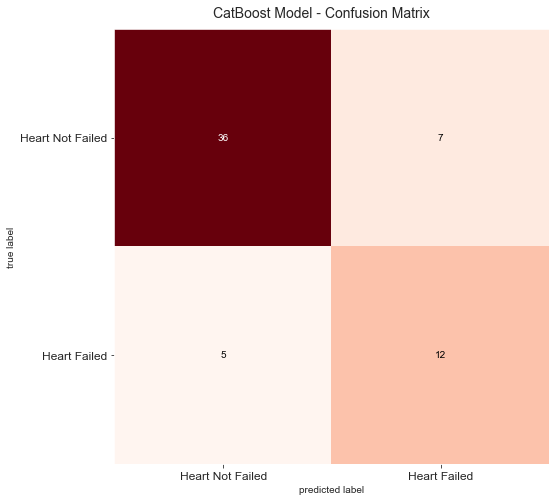

In [103]:
cat_clf_cm = confusion_matrix(y_test, cat_clf_pred)
# print(cat_clf_cm)

plt.figure()
plot_confusion_matrix(cat_clf_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"CatBoost Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

## Neural Network

#### Neural networks are also used for increasing the accuracy.

Neural networks are mostly similar to boosting techniques in terms of accuracy. Neural Networks generally require much more data to be effective.

#### Here, we are applying the Artificial Neural Network (ANN).

In [104]:
np.random.seed(0)

# Initialising the ANN
ann_model = Sequential()

# Adding the layers
ann_model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
ann_model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
ann_model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   # Adam optimizer

# Train the ANN
history = ann_model.fit(x_train, y_train, batch_size = 16, epochs = 100)   
# batch_size & epochs can be varied to obtain higher accuracy, comparison can be done using TensorBoard

Epoch 1/100
20/20 [==============================] - 19s 987us/step - loss: 0.6932 - accuracy: 0.5012
Epoch 2/100
20/20 [==============================] - 0s 842us/step - loss: 0.6932 - accuracy: 0.4949
Epoch 3/100
20/20 [==============================] - 0s 790us/step - loss: 0.6930 - accuracy: 0.5871
Epoch 4/100
20/20 [==============================] - 0s 842us/step - loss: 0.6923 - accuracy: 0.5339
Epoch 5/100
20/20 [==============================] - 0s 790us/step - loss: 0.6902 - accuracy: 0.5390
Epoch 6/100
20/20 [==============================] - 0s 842us/step - loss: 0.6848 - accuracy: 0.5660
Epoch 7/100
20/20 [==============================] - 0s 789us/step - loss: 0.6713 - accuracy: 0.7375
Epoch 8/100
20/20 [==============================] - 0s 895us/step - loss: 0.6471 - accuracy: 0.7301
Epoch 9/100
20/20 [==============================] - 0s 895us/step - loss: 0.6055 - accuracy: 0.7824
Epoch 10/100
20/20 [==============================] - 0s 789us/step - loss: 0.5467 - accur

20/20 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.8891
Epoch 82/100
20/20 [==============================] - 0s 895us/step - loss: 0.2875 - accuracy: 0.8975
Epoch 83/100
20/20 [==============================] - 0s 842us/step - loss: 0.2891 - accuracy: 0.8919
Epoch 84/100
20/20 [==============================] - 0s 790us/step - loss: 0.3394 - accuracy: 0.8561
Epoch 85/100
20/20 [==============================] - 0s 737us/step - loss: 0.3398 - accuracy: 0.8613
Epoch 86/100
20/20 [==============================] - 0s 790us/step - loss: 0.2760 - accuracy: 0.8940
Epoch 87/100
20/20 [==============================] - 0s 684us/step - loss: 0.3065 - accuracy: 0.8902
Epoch 88/100
20/20 [==============================] - 0s 895us/step - loss: 0.2937 - accuracy: 0.8753
Epoch 89/100
20/20 [==============================] - 0s 842us/step - loss: 0.2696 - accuracy: 0.8875
Epoch 90/100
20/20 [==============================] - 0s 842us/step - loss: 0.3633 - accuracy: 0.

In [105]:
# Predicting the results
ann_pred = ann_model.predict(x_test)
ann_pred = (ann_pred > 0.5)
np.set_printoptions()

ann_acc = accuracy_score(y_test, ann_pred)
accuracy_list.append(100*ann_acc)
# print("Accuracy of ANN is: ", "{:.2f}%".format(100* ann_acc))

In [106]:
ann_prec = precision_score(y_test, ann_pred)
ann_f1 = f1_score(y_test, ann_pred)
ann_recall = recall_score(y_test, ann_pred)
precision_list.append(100*ann_prec)
f1_list.append(100*ann_f1)
recall_list.append(100*ann_recall)
# print("Precision score of ANN is: ", "{:.2f}%".format(100* ann_prec))
# print("F1 score of ANN is: ", "{:.2f}%".format(100* ann_f1))
# print("Recall score of ANN is: ", "{:.2f}%".format(100* ann_recall))

In [107]:
print("Classification report of ANN is:")
print("--------------------------------\n")
print(classification_report(y_test, ann_pred))

Classification report of ANN is:
--------------------------------

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        43
           1       0.50      0.71      0.59        17

    accuracy                           0.72        60
   macro avg       0.68      0.71      0.69        60
weighted avg       0.76      0.72      0.73        60



<Figure size 1080x432 with 0 Axes>

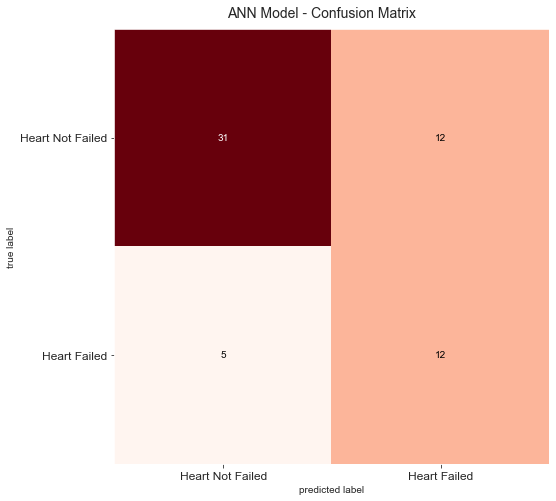

In [108]:
ann_cm = confusion_matrix(y_test, ann_pred)
# print(ann_cm)

plt.figure()
plot_confusion_matrix(ann_cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.figtext(0.5,0.9,"ANN Model - Confusion Matrix", fontsize=14, ha='center')
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

# Performance Analysis

In [109]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest',
             'Gradient Boosting', 'XGBM', 'XGBRF', 'LightGBM', 'CatBoost', 'ANN']

### Accuracy score

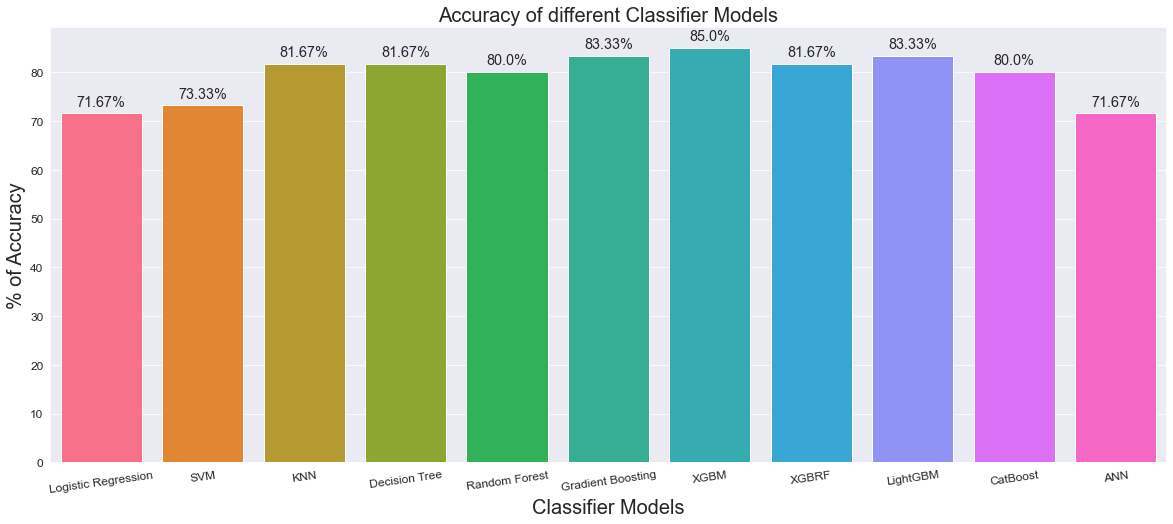

In [110]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### Precision score

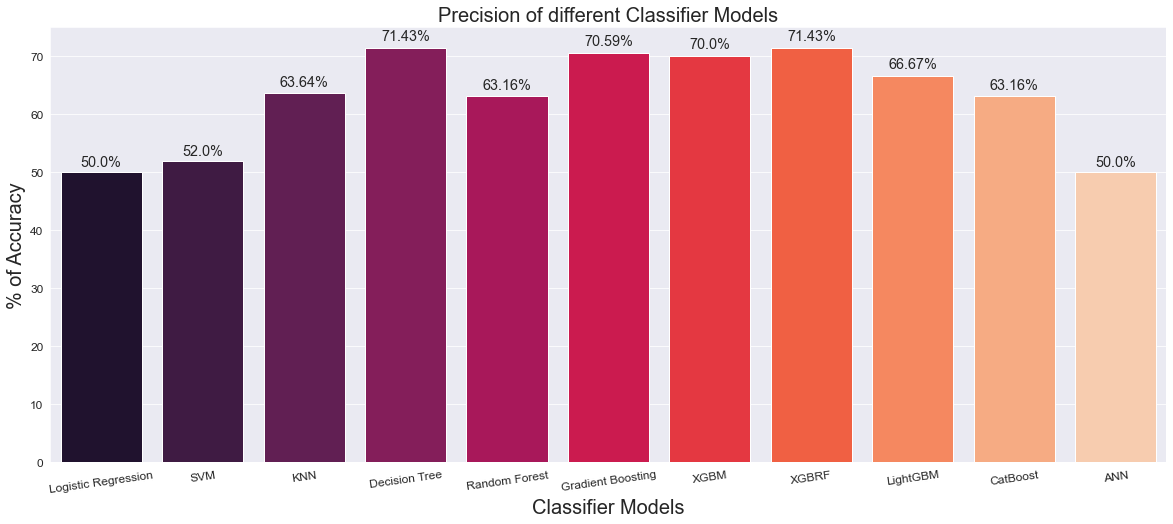

In [111]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=precision_list, palette = "rocket", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Precision of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### F-score

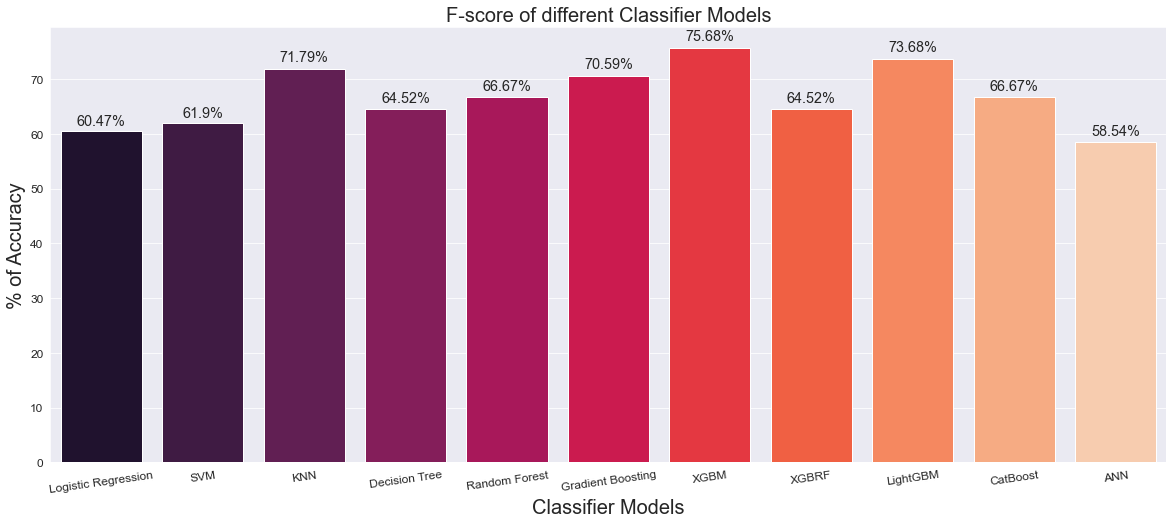

In [112]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=f1_list, palette = "rocket", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('F-score of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### Recall score

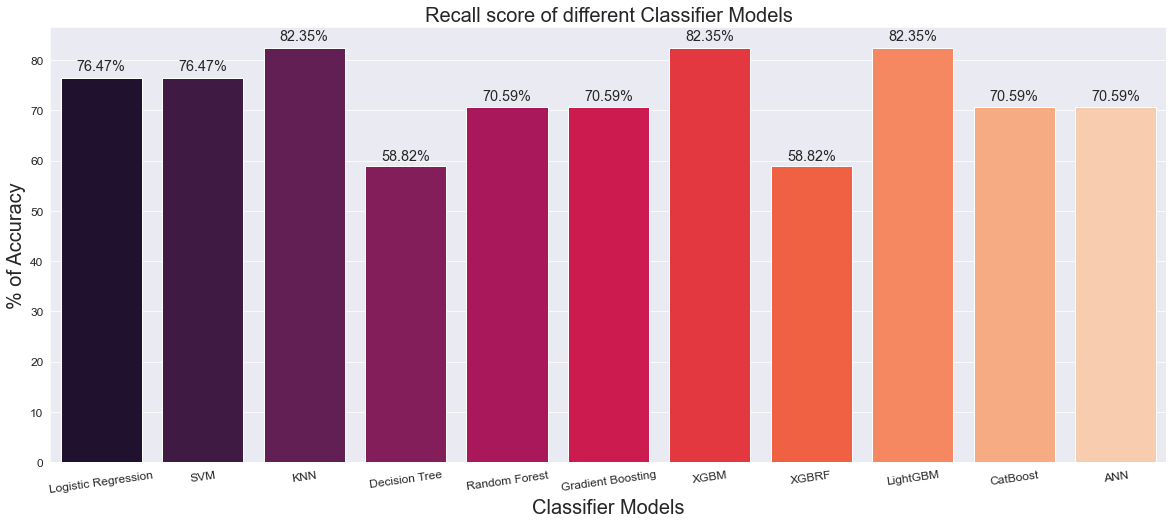

In [113]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=recall_list, palette = "rocket", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Recall score of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#### Conclusion
-----------

Based on highest accuracy and evaluation of other metrics, the best classifier algorithm is:
___Extreme Gradient Boosting/XGBM___